In [876]:
import pandas as pd
from dask import dataframe as dask_dataframe
import matplotlib.pyplot as plt

from matplotlib import rcParams

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.linewidth'] = 2
rcParams['savefig.dpi'] = 750
rcParams['font.size'] = 20
#plt.rc('font', family='serif')
import lsdb

%matplotlib inline

In [689]:
data = pd.read_parquet("/epyc/ssd/users/atzanida/tmp/starH24/StarHorse_Full_Comp_V_99_April24.parquet")#("/epyc/ssd/users/atzanida/tmp/starH24/StarHorse_Full_Comp_v3.parquet")

In [877]:
%%time
gaia = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/gaia_dr3/gaia")

CPU times: user 1.79 s, sys: 337 ms, total: 2.13 s
Wall time: 2.35 s


In [878]:
sample = gaia.head(1_000_000)

In [883]:
from astropy.coordinates import SkyCoord
from galpy.util.coords import pmrapmdec_to_pmllpmbb

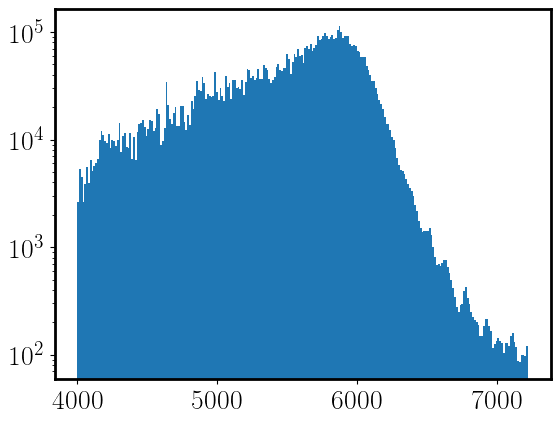

In [692]:
_ = plt.hist(data['teff50_StarHorse'], bins=250)
plt.yscale('log')

In [428]:
data[data['teff50_StarHorse']>6050]

,Source_StarHorse,RA_ICRS_StarHorse,DE_ICRS_StarHorse,teff50_StarHorse,logg50_StarHorse,met50_StarHorse,dist50_StarHorse,fidelity_StarHorse,GMAG0_StarHorse,BP-RP0_StarHorse,...,stetson_j,stetson_k,invNeumann,best_dip_power,best_dip_time_loc,best_dip_start,best_dip_end,best_dip_dt,best_dip_ndet,lc_score
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
576472361008627712,288236152883290880,22.344178,19.626078,6099.09,4.352598,-0.697202,0.964659,1.000000,4.421257,0.686510,...,17.676540,0.738940,0.462313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576471696081420288,288235839350451200,22.461617,19.655000,6083.19,4.453874,-1.422009,4.358568,0.999023,4.822675,0.691366,...,-22.491468,0.576125,0.196422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576479394466365440,288239691936384000,22.682948,19.697146,6219.68,4.306306,-0.388005,1.425123,1.000000,3.978858,0.670961,...,20.233482,0.748945,0.443413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576488422156271616,288244193062108544,22.613311,19.768206,6123.11,4.371502,-1.765807,4.997154,0.820313,4.526402,0.635391,...,18.086033,0.722694,0.498143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576505769126526976,288252886075872384,22.240066,19.772781,6311.77,4.338164,-0.414062,1.069243,1.000000,3.999855,0.623845,...,11.716024,0.725731,0.457534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873468899538763776,936734433137570816,119.989041,53.921921,6097.51,4.444314,-0.257348,1.203161,1.000000,4.456933,0.715107,...,49.366974,0.772682,0.564136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873461667979853824,936730825365016576,120.359375,54.110492,6066.19,4.319460,-0.579235,1.089532,1.000000,4.327166,0.706119,...,57.163616,0.751676,0.464741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873489840675225600,936744912857762560,120.055522,54.125903,6122.09,4.317000,-0.720795,5.555306,0.999023,4.332986,0.685965,...,27.316639,0.769406,0.485343,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [741]:
ja = ~np.isnan(data['teff50_StarHorse']) & ~np.isnan(data['chi2dof']) & (data['chi2dof']<1.03)
HH = np.histogram2d(data['teff50_StarHorse'][ja], data['chi2dof'][ja], bins=(350, 350))

/tmp/ipykernel_6290/2289146546.py:1: RuntimeWarning: divide by zero encountered in log
  plt.contourf(np.log(HH[0].T),
/tmp/ipykernel_6290/2289146546.py:1: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(np.log(HH[0].T),


(3980.0, 6500.0)

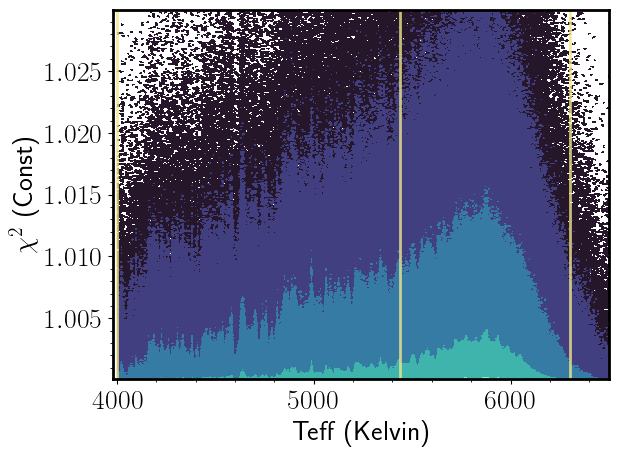

In [745]:
plt.contourf(np.log(HH[0].T), 
            aspect='auto', 
            extent=(min(HH[1]), max(HH[1]), min(HH[2]), max(HH[2])), 
          origin='lower', levels=5, cmap=sns.color_palette("mako", as_cmap=True))
plt.xlabel("Teff (Kelvin)")
plt.ylabel("$\chi^2$ (Const)")
plt.minorticks_on()
plt.axvline(6300, color='khaki', lw=2, alpha=0.8)
plt.axvline(5440, color='khaki', lw=2, alpha=0.8)
plt.axvline(4000, color='khaki', lw=2, alpha=0.8)
plt.xlim(4_000-20, 6500)

(3980.0, 6500.0)

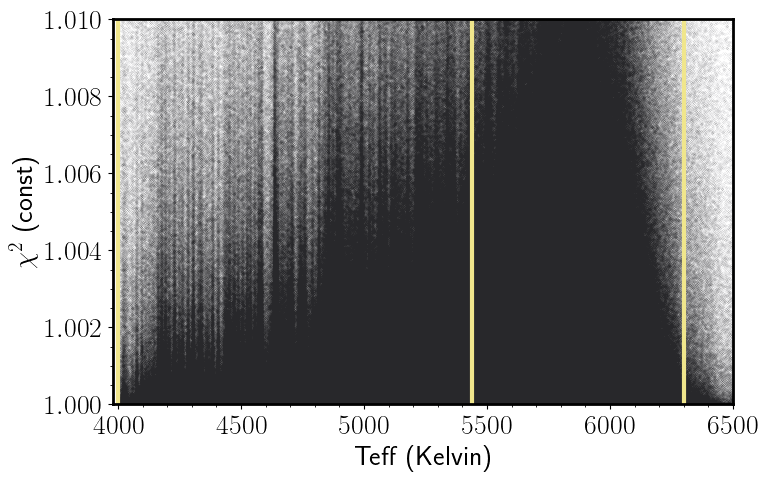

In [693]:
plt.figure(figsize=(8,5))
plt.scatter(data['teff50_StarHorse'], data['chi2dof'], s=0.001, 
           color='#28282B')
plt.minorticks_on()
plt.ylabel("$\chi^2$ (const)")
plt.ylim(1, 1.01)
plt.xlabel("Teff (Kelvin)")
plt.axvline(6300, color='khaki', lw=3)
plt.axvline(5440, color='khaki', lw=3)
plt.axvline(4000, color='khaki', lw=3)
plt.xlim(4_000-20, 6500)


In [779]:
q = (np.log(data['lc_score']) > 5) & (data['best_dip_ndet'] > 3)

/epyc/users/atzanida/anaconda3/envs/lsdb_demo_true/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [780]:
len(data[q])

1539

In [781]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin    # version >=0.3.0
from tqdm import tqdm

In [782]:

w1, w2, j, k = [], [], [], []
CATALOGUE = "II/328"
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]
tables = voresource.get_tables()
tables_names = list(tables.keys())


for (a, b) in tqdm(zip(data[q]['RA_ICRS_StarHorse'],data[q]['DE_ICRS_StarHorse'])):
    conesearch_radius = 1 / 250  # in degrees
    conesearch_center = (a, b)

    conesearch_records = voresource.get_service("conesearch").search(
    pos=conesearch_center,
    sr=conesearch_radius)

    tablo = conesearch_records.table

    if len(tablo)>0:
        w1.append(tablo['W1mag'].data.data[0])
        w2.append(tablo['W2mag'].data.data[0])
        j.append(tablo['Jmag'].data.data[0])
        k.append(tablo['Kmag'].data.data[0])


0it [00:00, ?it/s]WARNING: AstropyDeprecationWarning: Using the table property is deprecated. Please use the to_table() instead. [pyvo.dal.query]
1539it [18:19,  1.40it/s]


In [807]:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]
tables = voresource.get_tables()
tables_names = list(tables.keys())

conesearch_records = voresource.get_service("conesearch").search(
pos=(131.2, 9.312),
sr=1)

tablo = conesearch_records.table

In [808]:
dd = (~np.isnan(tablo['W2mag'])) & (~np.isnan(tablo['W1mag'])) & (~np.isnan(tablo['Jmag'])) & (~np.isnan(tablo['Kmag']))

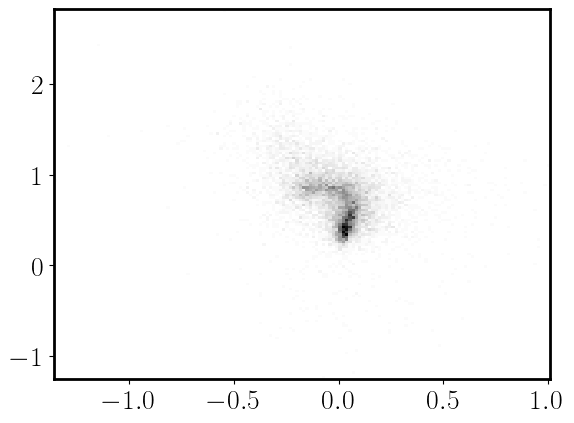

In [809]:
JJ = plt.hist2d(tablo['W2mag'][dd]-tablo['W1mag'][dd],
               tablo['Jmag'][dd]-tablo['Kmag'][dd],
               bins=(150, 150), cmap='binary')

/tmp/ipykernel_6290/3579664019.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(JJ[0].T))


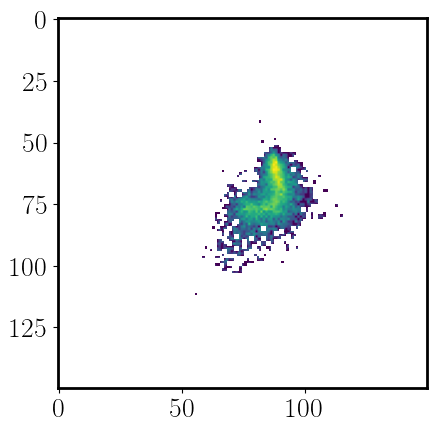

In [810]:
plt.imshow(np.log(JJ[0].T))

In [783]:
w1, w2 = np.array(w1), np.array(w2)

In [784]:
j, k = np.array(j), np.array(k)

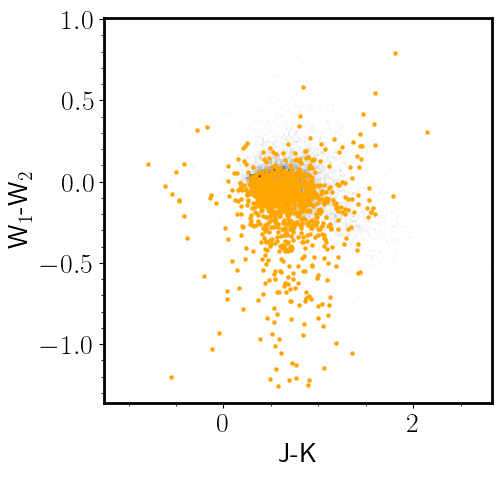

In [813]:
plt.figure(figsize=(5,5))
JJ = plt.hist2d(tablo['Jmag'][dd]-tablo['Kmag'][dd], tablo['W2mag'][dd]-tablo['W1mag'][dd],
               bins=(150, 150), cmap='binary')

plt.scatter(j-k, w1-w2, s=5, color='orange')
plt.xlabel("J-K")
plt.ylabel("W$_{1}$-W$_{2}$")
plt.minorticks_on()

In [467]:
conesearch_records.table

_r,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,Im,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,wx,wy,ID,snr1,chi2W1,snr2,chi2W2,snr3,chi2W3,snr4,chi2W4,chi2,nb,na,sat1,sat2,sat3,sat4,ccf,ex,var,nW1,mW1,nW2,mW2,nW3,mW3,nW4,mW4,satnum,RA_pm,e_RA_pm,DE_pm,e_DE_pm,cosig_pm,pmRA,e_pmRA,pmDE,e_pmDE,chi2W1_pm,chi2W2_pm,chi2W3_pm,chi2W4_pm,chi2pm,qpm,qph,fdet,fmoon,covW1,covW2,covW3,covW4,2Mkey,d2M,2M
,,deg,deg,arcsec,arcsec,deg,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,pix,pix,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,arcsec,deg,arcsec,arcsec,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,arcsec,
float64,str19,float64,float64,float64,float64,float32,str2,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float32,float64,float32,float64,float32,float64,float32,float32,uint8,uint8,float32,float32,float32,float32,str4,uint8,str4,int16,int16,int16,int16,int16,int16,int16,int16,int16,float64,float64,float64,float64,float64,int32,int32,int32,int32,float32,float32,float32,float32,float32,str5,str4,int16,int16,float64,float64,float64,float64,int64,float32,str2
0.002161,J025959.51+131156.6,44.9979907,13.1990825,0.0835,0.0795,153.2,Im,14.993,0.033,15.018,0.070,12.455,--,8.851,--,15.480,0.058,15.099,0.080,15.175,0.137,2053.509,919.790,450113601351016969,33.1,0.93,15.6,0.93,0.1,0.89,-0.6,0.93,0.92,1,0,0.000,0.000,0.000,0.000,0000,0,00nn,33,33,18,33,0,11,0,11,0,44.9979902,0.0853,13.1990827,0.0884,-0.0150,-28,134,0,147,0.93,0.93,0.89,0.93,0.92,1N000,AAUU,3,0,33.270,33.880,10.932,10.968,800825596,0.101,2M


In [445]:
 XMatch.query()

In [91]:
import seaborn as sns
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.cubehelix_palette(95, start=1, rot=-0.85).as_hex())

In [292]:
%%time
# Load FGK objects...
fgk_object = dask.dataframe.read_parquet("/nvme/users/atzanida/tmp/starhorse_new_april21.parquet").compute()

CPU times: user 57.5 s, sys: 6min 58s, total: 7min 55s
Wall time: 48.6 s


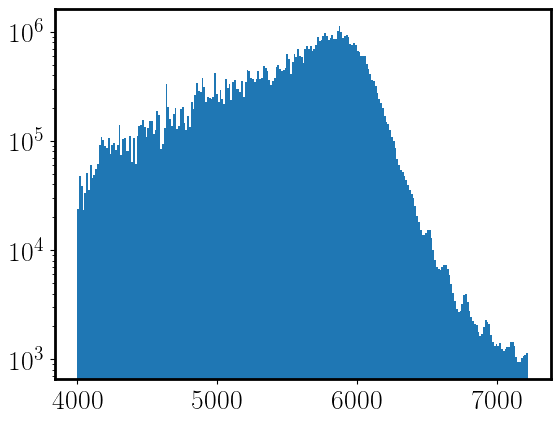

In [403]:
_ = plt.hist(fgk_object['teff50_StarHorse'], bins=250)
plt.yscale('log')

In [294]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp
from healpy.newvisufunc import projview

def cat2hpx(lon, lat, nside, radec=True):
    """
    Convert a catalogue to a HEALPix map of number counts per resolution
    element.

    Parameters
    ----------
    lon, lat : (ndarray, ndarray)
        Coordinates of the sources in degree. If radec=True, assume input is in the icrs
        coordinate system. Otherwise assume input is glon, glat

    nside : int
        HEALPix nside of the target map

    radec : bool
        Switch between R.A./Dec and glon/glat as input coordinate system.

    Return
    ------
    hpx_map : ndarray
        HEALPix map of the catalogue number counts in Galactic coordinates
    """
    npix = hp.nside2npix(nside)
    
    if radec:
        eq = SkyCoord(lon, lat, 'icrs', unit='deg')
        l, b = eq.galactic.l.value, eq.galactic.b.value
    else:
        l, b = lon, lat

    # conver to theta, phi
    theta = np.radians(90. - b)
    phi = np.radians(l)

    # convert to HEALPix indices
    indices = hp.ang2pix(nside, theta, phi)

    idx, counts = np.unique(indices, return_counts=True)

    # fill the fullsky map
    hpx_map = np.zeros(npix, dtype=int)
    hpx_map[idx] = counts
    
    return hpx_map

In [295]:
Sky = SkyCoord(ra=fgk_object['RA_ICRS_StarHorse'].values*u.deg, 
              dec=fgk_object['DE_ICRS_StarHorse'].values*u.deg)

In [296]:
# convert coordinates to Galactic frame (l,b)
sky_gal = Sky.galactic

In [306]:
SkyDp = SkyCoord(ra=data['RA_ICRS_StarHorse'][q].values*u.deg, 
                 dec=data['DE_ICRS_StarHorse'][q].values*u.deg).galactic

/tmp/ipykernel_6290/1366497227.py:8: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hpx_map), cmap='inferno', hold=True,min=-2, max=3,


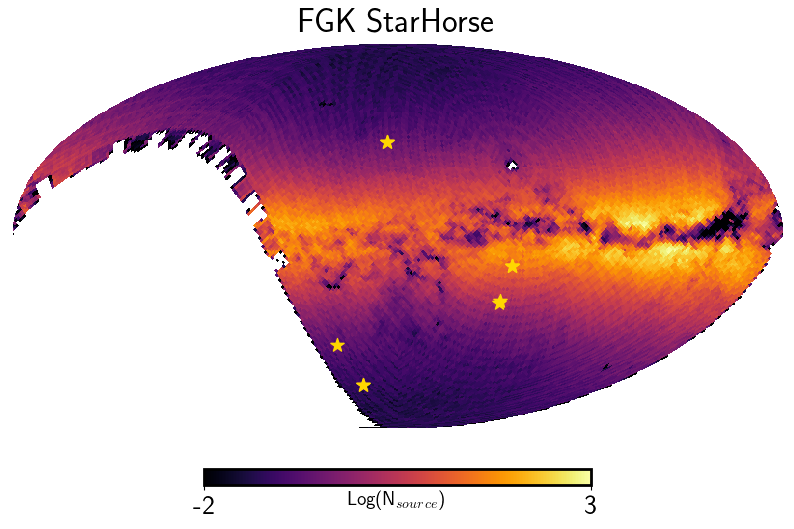

In [324]:
# Create Healpy projection 
hpx_map = cat2hpx(sky_gal.l.value-180,
                  sky_gal.b.value, 
                  nside=50, radec=False)

fig = plt.figure(figsize=(10,10))
plt.grid(True, color='k', lw=22)
hp.mollview(np.log(hpx_map), cmap='inferno', hold=True,min=-2, max=3,
                   flip='astro', remove_dip=False,
                   remove_mono=True, 
                  title='FGK StarHorse', 
           unit='Log(N$_{source}$)')

for i in np.random.randint(0, 50, 10):
    hp.projscatter(SkyDp.l.value[i] - 180,
                   SkyDp.b.value[i],
                   lonlat=True, s=100, color='gold', marker='*')

In [315]:
hpx_map

array([519, 440, 459, ..., 296, 547, 753])

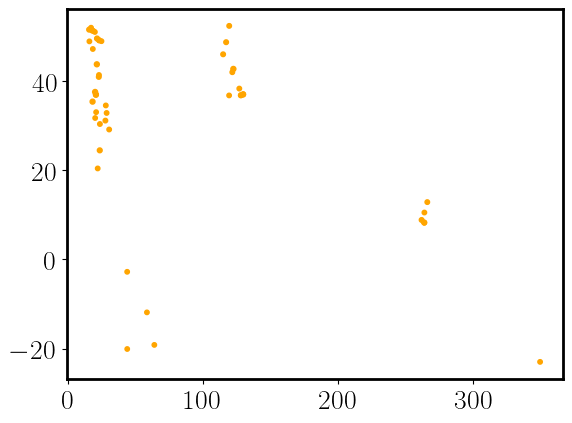

In [291]:
q = np.log(data['lc_score']) > 10
plt.scatter(data['RA_ICRS_StarHorse'][q], data['DE_ICRS_StarHorse'][q], s=np.log(data['lc_score'])[q], 
           color='orange')

In [752]:
q1 = (data['lc_score']) > 0

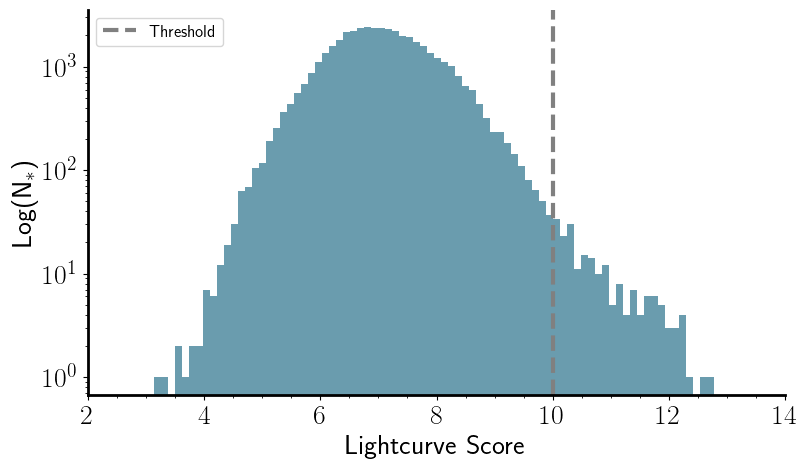

In [819]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
_ = ax.hist(np.log(data['lc_score'][q1]), bins=80, color="#6a9cae")
ax.set_yscale('log')
ax.set_xlabel("Lightcurve Score")
ax.set_ylabel("Log(N$_{{*}}$)")
ax.axvline(10, ls='--', color='gray', lw=3, 
           label='Threshold')
ax.legend(fontsize=12, loc=2)
_ = plt.xticks(np.arange(0, 16, step=2))
plt.xlim(2)
plt.minorticks_on()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [762]:
data.head(1).keys()

Index(['RA_ICRS_StarHorse', 'DE_ICRS_StarHorse', 'ps1_objid_ztf_dr14',
       'teff50_StarHorse', 'GMAG0_StarHorse', 'Norder', 'Dir', 'Npix', 'Nphot',
       'biweight_scale', 'frac_above_2_sigma', 'Ndips', 'rate', 'chi2dof',
       'skew', 'kurtosis', 'mad', 'stetson_i', 'stetson_j', 'stetson_k',
       'invNeumann', 'best_dip_power', 'best_dip_time_loc', 'best_dip_start',
       'best_dip_end', 'best_dip_dt', 'best_dip_ndet', 'lc_score'],
      dtype='object')

Text(0.5, 0, '$\\eta$ (von Neumann)')

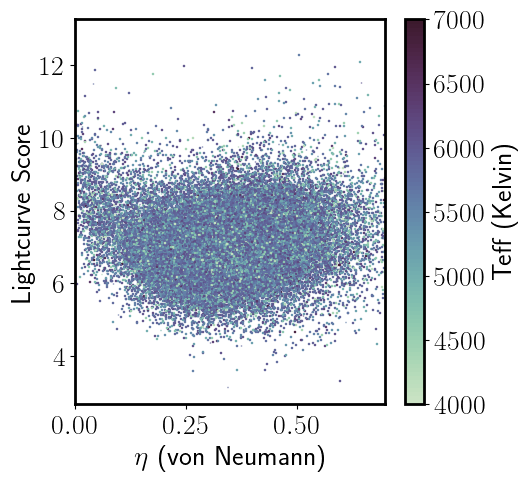

In [769]:
plt.figure(figsize=(5,5))
plt.scatter(data['invNeumann'], np.log(data['lc_score']), s=0.5, c=data['teff50_StarHorse'], 
           cmap=my_cmap, vmin=4_000, vmax=7_000, marker='s')
plt.colorbar(label='Teff (Kelvin)')
plt.xlim(0, 0.7)
plt.ylabel("Lightcurve Score")
plt.xlabel("$\eta$ (von Neumann)")

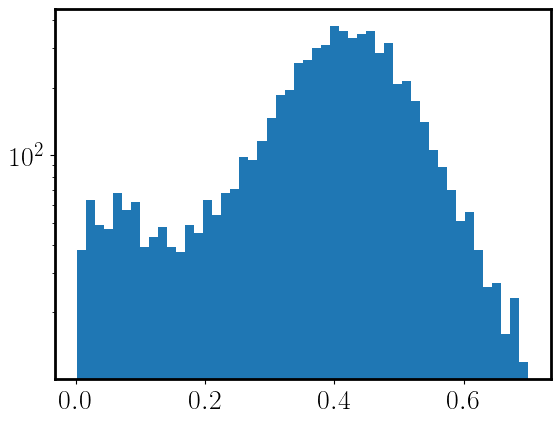

In [272]:
_ = plt.hist(data['invNeumann'][rmn], bins=50)
plt.yscale('log')

In [146]:
from sklearn.mixture import GaussianMixture

In [209]:
rmn = (~np.isnan(data['lc_score'])) & (data['invNeumann'] < 0.7) &\
(np.log(data['lc_score'] < 20))

/epyc/users/atzanida/anaconda3/envs/lsdb_demo_true/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [223]:
X = np.vstack([data['invNeumann'][rmn],
               np.log(data['lc_score'][rmn])]).T

In [224]:
X

array([[0.06435875, 7.11175102],
       [0.44279888, 6.50125261],
       [0.51166324, 6.03097388],
       ...,
       [0.37719552, 5.64164289],
       [0.47907333, 7.27449334],
       [0.4211157 , 5.8789567 ]])

In [263]:
N = np.arange(1, 15)

def compute_GaussianMixture(N, covariance_type='full', max_iter=2_000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter,
                                    covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GaussianMixture(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

i_best = np.argmin(BIC)
gmm_best = models[i_best]
print("best fit converged:", gmm_best.converged_)
print("BIC: n_components =  %i" % N[i_best])

best fit converged: True
BIC: n_components =  10


In [264]:
import itertools
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
from scipy import linalg

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)

    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)


        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

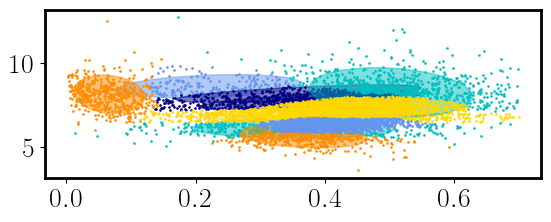

In [265]:
plot_results(X, gmm_best.predict(X), 
             gmm_best.means_, gmm_best.covariances_, 
             0, "Gaussian Mixture")

In [ ]:
x = np.linspace(min(data['invNeumann'][rmn]), max(data['invNeumann'][rmn]))
y = np.linspace(min(np.log(data['lc_score'][rmn])), max(np.log(data['lc_score'][rmn])))
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm_best.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, levels=np.logspace(0, 15, 250)
)

plt.scatter(data['invNeumann'], np.log(data['lc_score']), s=2.5, c=data['BP-RP0_StarHorse'], 
           cmap=my_cmap, vmin=0.5, vmax=1, marker='s')

plt.xlim(0, 0.7)
plt.ylabel("Lightcurve Score")
plt.xlabel("Neumann")

In [ ]:
gmm_best.score_samples

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

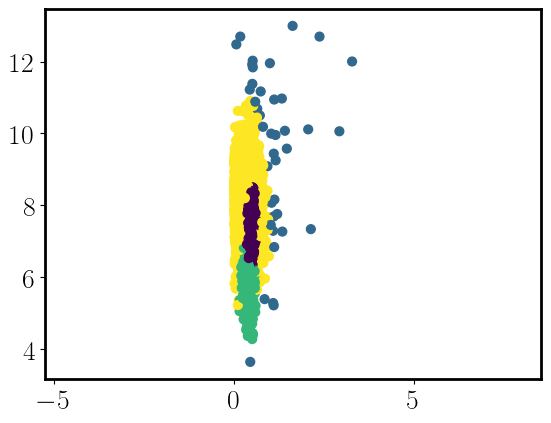

In [188]:
#gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm_best, X)

In [162]:
from astroML.plotting.tools import draw_ellipse

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

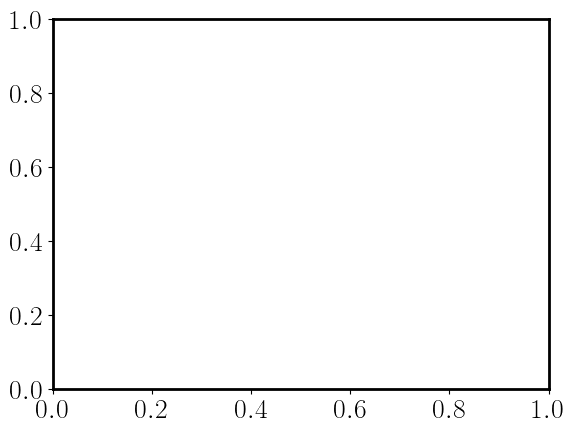

In [173]:
fig, ax = plt.subplots(nrows=1, ncols=1)

for mu, C, w in zip(gmm_best.means_, gmm_best.covariances_, gmm_best.weights_):
    draw_ellipse(mu, C, scales=[1.5], ax=ax)

In [551]:
%%time
test = pd.read_parquet("/epyc/ssd/users/atzanida/tmp/starH24/StarHorse_Full_Comp_V_99_April24.parquet")

CPU times: user 3min 37s, sys: 1min 41s, total: 5min 19s
Wall time: 59.6 s


In [549]:
qq = data['lc_score']>0
qs = (np.log(test['lc_score'])>10) & (test['best_dip_power']>7) &\
(test['best_dip_ndet'] > 4) & (test['best_dip_ndet']>4)

/epyc/users/atzanida/anaconda3/envs/lsdb_demo_true/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [550]:
test[qs]

,RA_ICRS_StarHorse,DE_ICRS_StarHorse,ps1_objid_ztf_dr14,teff50_StarHorse,GMAG0_StarHorse,Norder,Dir,Npix,Nphot,biweight_scale,...,stetson_j,stetson_k,invNeumann,best_dip_power,best_dip_time_loc,best_dip_start,best_dip_end,best_dip_dt,best_dip_ndet,lc_score
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
4985722523233550336,33.831148,-3.932707,103280338311061184,5805.00,4.652186,0,0,4,282.0,0.011314,...,43.472408,0.576482,0.571893,8.493587,58836.09507,58814.21390,58862.20044,0.0,5.0,57319.112217
5349007380703084544,325.252009,-1.541016,106153252520321170,5840.40,4.755240,0,0,4,241.0,0.012126,...,189.432800,0.218663,0.042674,67.892685,58375.34622,58366.32415,58423.14680,0.0,5.0,144957.020445
6178573471866421248,117.086382,3.713879,112451170863937103,4743.51,6.520425,2,0,85,148.0,0.035071,...,55.947197,0.609862,0.363757,7.660642,59250.25298,59225.37320,59265.25748,0.0,5.0,24145.671016
6184969885899030528,128.928623,4.856692,113821289286148504,6095.27,4.245308,2,0,85,217.0,0.012996,...,65.169739,0.536799,0.194053,10.419907,58443.44146,58434.50113,58461.50739,0.0,5.0,27995.938126
6224768666978746368,103.504622,-0.981707,106821035046272394,6259.09,3.895450,2,0,86,212.0,0.018453,...,252.267517,0.468681,0.087354,14.803802,58736.51553,58557.20490,58745.49681,0.0,6.0,45795.515882
6229597219226386432,106.791415,2.237847,110681067914135857,6042.31,4.020288,2,0,86,291.0,0.023595,...,330.183228,0.460519,0.053849,16.618395,59226.29189,59221.25879,59232.30148,0.0,10.0,28873.687443
6243708457363439616,93.599617,-0.255278,107690935995984132,4578.26,7.026182,2,0,86,196.0,0.018733,...,112.816216,0.393264,0.173724,25.371277,58787.52042,58778.46228,58805.38339,0.0,5.0,131219.069820
6247164222984159232,95.053591,1.124546,109340950535769889,6046.54,4.399540,2,0,86,252.0,0.015995,...,92.579880,0.543705,0.244378,9.762044,58871.25515,58859.35301,58877.25827,0.0,6.0,164031.245512
8471906124184944640,300.602812,-1.404507,106313006028075009,5914.35,4.532035,2,0,117,288.0,0.034419,...,322.838989,0.650157,0.599673,7.358312,58715.17867,58700.38389,58719.18293,0.0,5.0,54871.421638


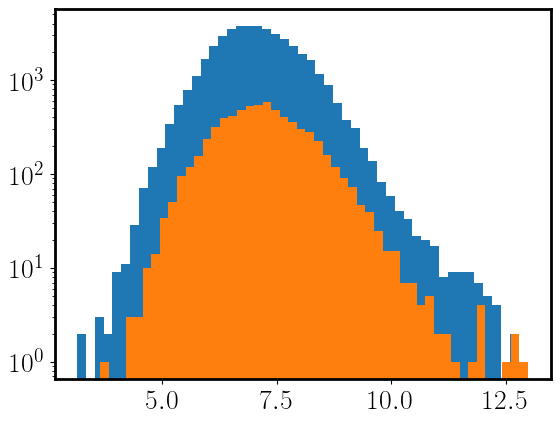

In [525]:
_ = plt.hist(np.log(test['lc_score'][qs]), bins=50)
_ = plt.hist(np.log(data['lc_score'][qq]), bins=50)
plt.yscale('log')


In [485]:
len(test)

3220669

In [487]:
len(test)

5984616

In [494]:
len(test)

6404829

In [552]:
len(test)

6406360

In [ ]:
6416731

In [579]:
data.keys()

Index(['Source_StarHorse', 'RA_ICRS_StarHorse', 'DE_ICRS_StarHorse',
       'teff50_StarHorse', 'logg50_StarHorse', 'met50_StarHorse',
       'dist50_StarHorse', 'fidelity_StarHorse', 'GMAG0_StarHorse',
       'BP-RP0_StarHorse', 'Norder_StarHorse', 'Dir_StarHorse',
       'Npix_StarHorse', 'ps1_objid_ztf_dr14', 'ra_ztf_dr14', 'dec_ztf_dr14',
       'ps1_gMeanPSFMag_ztf_dr14', 'ps1_rMeanPSFMag_ztf_dr14',
       'ps1_iMeanPSFMag_ztf_dr14', 'nobs_g_ztf_dr14', 'nobs_r_ztf_dr14',
       'nobs_i_ztf_dr14', 'mean_mag_g_ztf_dr14', 'mean_mag_r_ztf_dr14',
       'mean_mag_i_ztf_dr14', 'Norder_ztf_dr14', 'Dir_ztf_dr14',
       'Npix_ztf_dr14', '_DIST', 'Norder', 'Dir', 'Npix', 'Nphot',
       'biweight_scale', 'frac_above_2_sigma', 'Ndips', 'rate', 'chi2dof',
       'skew', 'kurtosis', 'mad', 'stetson_i', 'stetson_j', 'stetson_k',
       'invNeumann', 'best_dip_power', 'best_dip_time_loc', 'best_dip_start',
       'best_dip_end', 'best_dip_dt', 'best_dip_ndet', 'lc_score'],
      dtype='object')

In [612]:
data_cop = data[['frac_above_2_sigma', 'Ndips', 'rate', 'chi2dof',
       'skew', 'kurtosis', 'mad', 'stetson_i', 'stetson_j', 'stetson_k',
       'invNeumann', 'best_dip_power', 'best_dip_time_loc', 'best_dip_start',
       'best_dip_end', 'best_dip_dt', 'best_dip_ndet', 'lc_score']]

In [674]:
qc = (np.log10(data_cop['lc_score'])>3) & (data_cop['chi2dof']<1.01) & (data_cop['frac_above_2_sigma']>0.03)

In [675]:
taso = data_cop[qc]

In [676]:
len(taso)

568

In [677]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=1_000, contamination=0.01)

In [678]:
clf.fit(taso)

IsolationForest(contamination=0.01, n_estimators=1000)

In [679]:
_ids = clf.predict(taso)

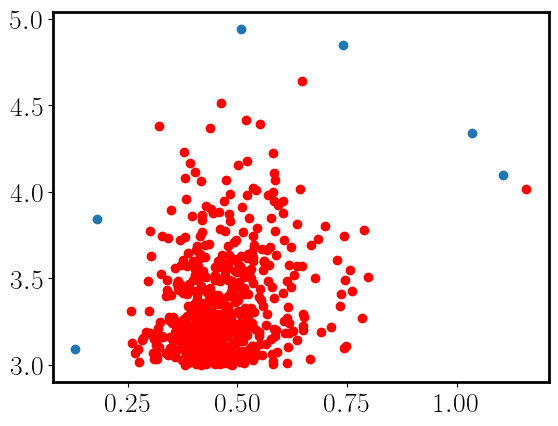

In [873]:
plt.scatter(taso['invNeumann'][_ids==-1],
            np.log10(taso['lc_score'][_ids==-1]))
plt.scatter(taso['invNeumann'][_ids==1],
            np.log10(taso['lc_score'][_ids==1]), color='red')

In [868]:
taso[_ids==-1]

,frac_above_2_sigma,Ndips,rate,chi2dof,skew,kurtosis,mad,stetson_i,stetson_j,stetson_k,invNeumann,best_dip_power,best_dip_time_loc,best_dip_start,best_dip_end,best_dip_dt,best_dip_ndet,lc_score
_hipscat_index,,,,,,,,,,,,,,,,,,
648304213834596352,0.032189,1.0,0.000644,1.003151,0.642903,1.752720,0.018761,866.867249,191.388641,0.751089,0.741641,4.392077,59815.39219,59810.45094,59819.47490,0.0,3.0,70756.859449
805341982497964032,0.031042,1.0,0.000641,1.000211,1.361366,5.186357,0.019890,2234.461914,470.068176,0.726077,1.105320,6.129197,59783.40699,59765.44980,59798.45620,0.0,6.0,12531.592523
808017811455606784,0.033989,1.0,0.000641,1.008568,1.442202,5.590500,0.012079,436.282166,100.114265,0.713821,0.509473,5.756490,59725.46089,59723.47006,59738.45775,0.0,8.0,87359.186766
8978229991644856320,0.030848,5.0,0.003066,1.007073,4.028402,28.773089,0.017437,21.243690,28.961739,0.588522,0.130694,10.866772,59316.48464,59311.49964,59322.46751,0.0,3.0,1235.442594
10217652182396698624,0.030151,2.0,0.001343,1.004467,3.562975,19.443948,0.010206,351.272858,48.076561,0.538983,0.180091,10.497635,59189.24235,59185.23149,59194.16993,0.0,5.0,6984.970942
1823089509479219200,0.041899,1.0,0.000621,1.006769,0.826197,1.233123,0.015068,751.723511,290.668518,0.755752,1.034579,4.161377,58231.16502,58223.18588,58254.17028,0.0,4.0,21876.167850


In [688]:
inv = 648304213834596352
data.loc[inv]['RA_ICRS_StarHorse'],data.loc[inv]['DE_ICRS_StarHorse']

(22.545012978, 40.9122728351)

In [657]:
from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

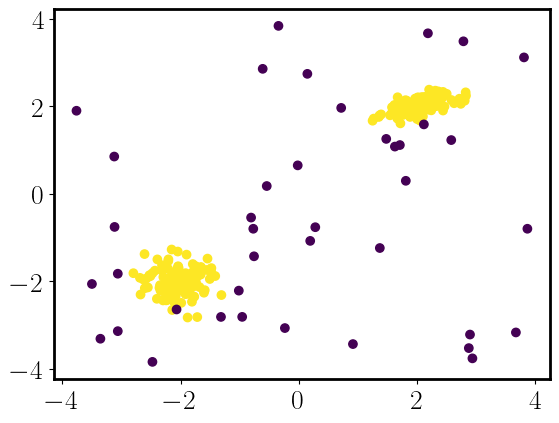

In [555]:
plt.scatter(X[:,0], X[:,1], c=y)

In [574]:

clf.fit(X_train)

IsolationForest(max_features=1, max_samples=50, random_state=0)

In [575]:
clf.predict(X_test)

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1])

In [576]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1])

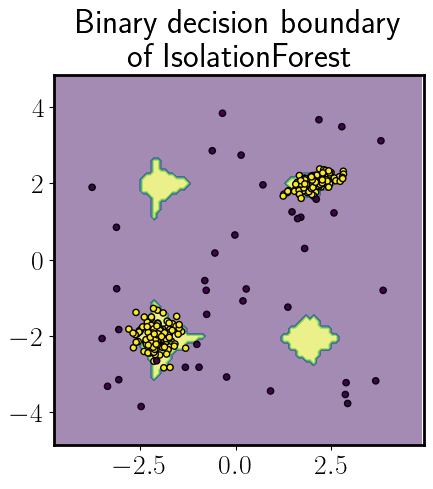

In [577]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")

plt.show()


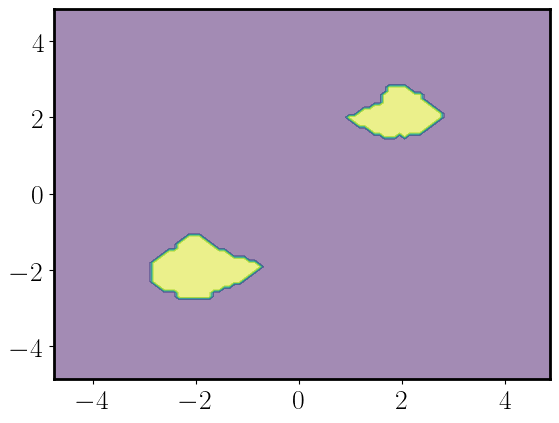

In [559]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)

In [821]:
from astropy.io import ascii

In [865]:
lc_1r = ascii.read("https://ztf.snad.space/dr17/csv/865104300005750")
lc_1g = ascii.read("https://ztf.snad.space/dr17/csv/865204300007666")

Text(0.5, 0, 'Time (MJD)')

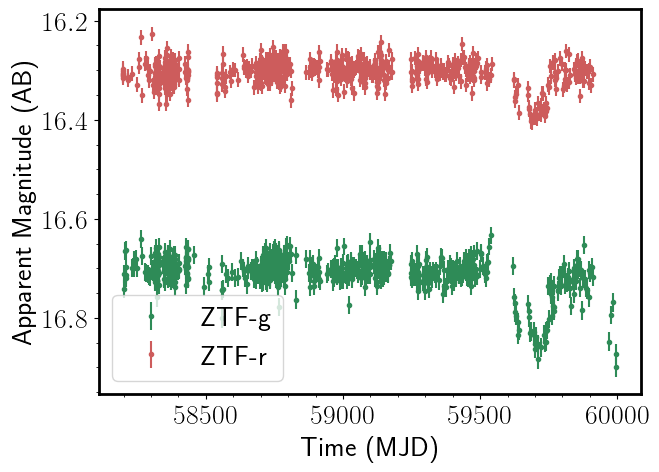

In [867]:
plt.figure(figsize=(7,5))
plt.errorbar(lc_1r['mjd'], lc_1r['mag'], yerr=lc_1r['magerr'], fmt='.', 
            color='seagreen', 
            label='ZTF-g')
plt.errorbar(lc_1g['mjd'], lc_1g['mag'], yerr=lc_1g['magerr'], fmt='.', 
            color='indianred', 
            label='ZTF-r')
plt.legend(loc=3)
plt.ylim(plt.ylim()[::-1])
plt.minorticks_on()
plt.ylabel("Apparent Magnitude (AB)")
plt.xlabel("Time (MJD)")